In [98]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [99]:
# Load CIFAR-10 dataset
(itrain, ltrain), (itest, ltest) = cifar10.load_data()


In [100]:
# Preprocess the data
itrain = itrain / 255.0
itest = itest / 255.0
ltrain = to_categorical(ltrain)
ltest = to_categorical(ltest)

In [101]:
# Load pre-trained VGG16 model (excluding the top fully-connected layers)
basem = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [102]:
# Freeze the pre-trained layers
for layer in basem.layers:
   layer.trainable = False

In [103]:
#c. Add custom classifier with several layers of trainable parameters to model
from tensorflow.keras.models import Model
x = Flatten()(basem.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=basem.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
# Create a new model on top
semodel = Sequential()
semodel.add(basem)
semodel.add(Flatten())
semodel.add(Dense(256, activation='relu'))
semodel.add(Dense(10, activation='softmax'))  # CIFAR-10 has 10 classe

In [105]:
# Compile the model
semodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
#d. Train classifier layers on training data available for task
# Train the model
semodel.fit(itrain, ltrain, epochs=2, batch_size=32, validation_data=(itest, ltest))

Epoch 1/2
1563/1563 [==============================] - 368s 234ms/step - loss: 1.3478 - accuracy: 0.5284 - val_loss: 1.2273 - val_accuracy: 0.5686
Epoch 2/2
1563/1563 [==============================] - 386s 247ms/step - loss: 1.1702 - accuracy: 0.5914 - val_loss: 1.1830 - val_accuracy: 0.5839


In [107]:
# Evaluate the model on test data
ltest, atest = semodel.evaluate(itest, ltest)
print("Test accuracy:", atest)

313/313 [==============================] - 62s 197ms/step - loss: 1.1830 - accuracy: 0.5839
Test accuracy: 0.583899974822998


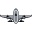

In [144]:
from PIL import Image
img = Image.open("plane323.jpg")
img

In [145]:
import numpy as np
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.array([img])

In [146]:
res = semodel.predict(img)

1/1 [==============================] - 0s 26ms/step


In [147]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
labels[res.argmax()]

'horse'